### Coursera - 顽想学概率 - 概率一 - Week5 - Test2


```text
题目描述如下：

巷子呈直線,長 L=400m,艾波寧以 v=4m/s初速等速穿越。

士兵時時刻刻瞄準她;
第t秒時是否擊中她,是隨時間t的均勻的泊松事件(Poisson process), 且與距離無關 。
其中,平均每μ秒能擊中一次,μ=100/ln(50)約為 25.5622。
士兵無法擊中巷子以外的區域;另外,只要她處於巷中,μ就是常數。

當她每被擊中一槍,速度就會減半;直到她恰中4槍時,會當場死亡。
亦即,中n槍時速度依序為 4,2,1,0.5m/s,其中 n依序為 0,1,2,3。

請問艾波寧成功捎信的機率為何? 
亦即,在她處於巷子之中時,被射中低於四槍的機率為何?(用小數即可,誤差合理給對)

```

----------

##### 要求被射中低于4枪的概率，也就是要求: P(射中0枪)+P(射中1枪)+P(射中2枪)+P(射中3枪)

##### 根据题意可知：
- 被击中的概率分布是随时间t的均匀泊松分布, $\lambda=1/\mu$
- 被击中的间隔时间的概率分布满足指数分布

[泊松分布](https://www.zhihu.com/question/24796044/answer/673838656)
[指数分布](https://www.zhihu.com/question/24796044/answer/673838656)

#### **被击中0枪**

**就是以4m/s的速度跑完400m，总耗时100s; 也就是要求100s内被击中0枪的概率，根据泊松分布计算。**

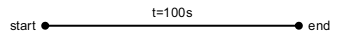

t=100s, $\lambda=1/\mu$

$P(G=0) = (\lambda t)^0\frac{e^{-\lambda t}}{0!} = e^{-\lambda t}  = e^{-\frac{t}{\mu}}$

#### **被击中1枪**
**先以4m/s的速度跑了$t_1$秒，被击中，再以2m/s的速度跑完剩下的距离。**

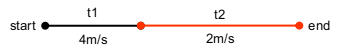

用指数分布计算$t_1$作为被击中间隔时长的概率密度:    $f(t_1)=\lambda e^{-\lambda t_1}$

用泊松分布计算$t_2$时间内被击中0枪的概率:  $P(t_2, 0枪) = e^{-\lambda t_2} = e^{-\frac{t_2}{\mu}}$

$t_1$与$t_2$的关系为： $4t_1 + 2t_2 = 400$, $t_1$的取值范围为[0, 100], $t_2$的取值范围为[0, 200-2$t_1$]

$P(G=1) = \int^{100}_0 \lambda e^{-\lambda t_1} e^{-\lambda t_2} dt_1 = \int^{100}_0 \lambda e^{-\lambda (200 - t_1)} dt_1$

#### **被击中2枪**
**在击中一枪的基础上加上1个时间间隔**

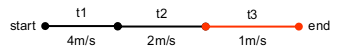

$4t_1 + 2t_2 + t_3 = 400$

$P(G=2) = \int_0^{100}\int_0^{200-2t_1}\lambda e^{-\lambda t_1} \lambda e^{-\lambda t_2} e^{-\lambda t_3} dt_2 dt_1
= \int_0^{100}\int_0^{200-2t_1}\lambda^2 e^{- \lambda (400 - 3t_1 - t_2)} dt_2 dt_1
$



#### **被击中3枪**
**在击中2枪的基础上再加上1个时间间隔**

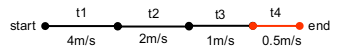

$4t_1 + 2t_2 + t_3 + 0.5t_4 = 400$

$P(G=3) = \int_0^{100}\int_0^{200-2t_1}\int_0^{400-4t_1-2t_2} \lambda e^{-\lambda t_1} \lambda e^{-\lambda t_2} \lambda e^{-\lambda t_3} e^{-\lambda t_4} dt_2 dt_1
= \int_0^{100}\int_0^{200-2t_1}\int_0^{400-4t_1-2t_2} \lambda^3 e^{- \lambda (800 - 7t_1 - 3t_2 - t_3)} dt_3dt_2 dt_1
$

##### P(安全送信) = P(G=0) + p(G=1) + P(G=2) +P(G=3)

***下面是python计算的代码***

In [1]:
from sympy import integrate, exp, symbols


u = 25.5622
lam = 1/u


In [2]:
P0 = exp(-lam*100)
print(P0)

0.0199999330804848


In [3]:
t1 = symbols('t1')
P1 = integrate(lam*exp(-lam*(200-t1)), (t1, 0, 100))
print(P1)

0.0195999357572609


In [4]:
t1, t2 = symbols('t1 t2')
P2 = integrate((lam*lam)*exp(-lam*(400-3*t1-t2)), (t2, 0, 200-2*t1), (t1, 0, 100))
print(P2)

0.0129333447297189


In [5]:
t1, t2, t3 = symbols('t1 t2 t3')
P3 = integrate((lam*lam*lam)*exp(-lam*(800 - 7*t1 - 3*t2 - t3)), (t3, 0, 400 - 4*t1 - 2*t2), (t2, 0, 200-2*t1), (t1, 0, 100))
print(P3)

0.00735241057636804


In [6]:
P = P0 + P1 + P2 + P3
print(P)

0.0598856241438327
